## A.  Description of Real-World Organizational Situation

### A1. Research Question
The data set selected for this performance assessment is the **churn** data set. The research question for this assessment is:  

*Are the variables `Churn` and `OnlineBackup` independent of each other?*

### A2. Benefits of Analysis to Stakeholders
This analysis could prove beneficial to the stakeholders by providing insight into a potential indicator of whether a customer will retain their service or churn. This hypothesis supposes that a customer utilizing the online backup service may be less likely to terminate their contract, or churn, as they may be dependent on the backup service for storage of important documents, photos, etc. If the analysis supports this hypothesis, it could benefit the stakeholders by enabling them to promote a service that minimizes churn and retains customers in the long term.

### A3. Relevant Data
Two fields are required to answer this question: 

- `Churn`: Whether the customer discontinued service within the last month (yes, no) (**binary nominal categorical data**)
- `OnlineBackup`: Whether the customer has an online backup add-on (yes, no) (**binary nominal categorical data**)

## B.  Description of the Data Analysis

### B1. Code for the $\chi^2$ Test for Independence

In [1]:
## B1. Code for the Chi Square Test

# Import the Pandas library and the Chi Square Test for Independence, chi2_contingency, from scipy.stats 
# then load the data into a data frame with Pandas' .read_csv() function
import pandas as pd 
from scipy.stats import chi2_contingency

df = pd.read_csv('/Users/drewmendez/Documents/WGU/D207_churn/churn_clean.csv')

# Generate the Contingency Table
contingency_table = pd.crosstab(df['Churn'], df['OnlineBackup'])

# Perform Chi Square Test
chisq, p, dof, expected = chi2_contingency(contingency_table)

### B2. Output and Results of the Analysis

In [2]:
## B2. Output of Results

print('Contingency Table')
print(contingency_table)
print('Chi Square Statistic:', chisq)
print('P-value:', p)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:')
print(expected)

Contingency Table
OnlineBackup    No   Yes
Churn                   
No            4149  3201
Yes           1345  1305
Chi Square Statistic: 25.28155392637337
P-value: 4.954240771375977e-07
Degrees of Freedom: 1
Expected Frequencies:
[[4038.09 3311.91]
 [1455.91 1194.09]]


### B3. Justification for Analysis

Since the research question pertains to two categorical variables, the $\chi^2$ Test for Independence was chosen because it can show if there is a relationship between the two categorical variables (Bobbitt, 2021).

## C. Univariate Statistics
It is shown below that the distributions of the four chosen variables are:

- `Age`: uniformly distributed
- `Income`: skewed right
- `Churn`: skewed towards 'No'
- `Gender`: skewed towards 'Female'

### C1. Visualization of the Distributions of Two Continuous Variables
The distributions of the following continuous variables will be visualized using boxplots and statistical summaries from the `.describe()` method.

- `Age`: Age of customer (**continuous numeric data**)
- `Income`: Annual income of customer (**continuous numeric data**)

In [3]:
## C1. Visualization of Distribution of Continuous Variables with Statistical Summaries

data = df[['Age', 'Income']]

data.describe()


,Age,Income
count,10000.000000,10000.000000
mean,53.078400,39806.926771
std,20.698882,28199.916702
min,18.000000,348.670000
25%,35.000000,19224.717500
50%,53.000000,33170.605000
75%,71.000000,53246.170000
max,89.000000,258900.700000


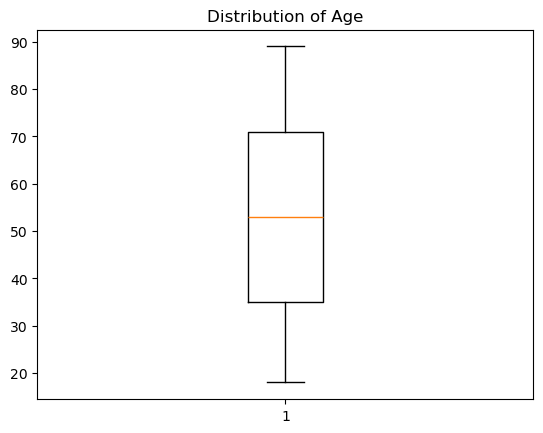

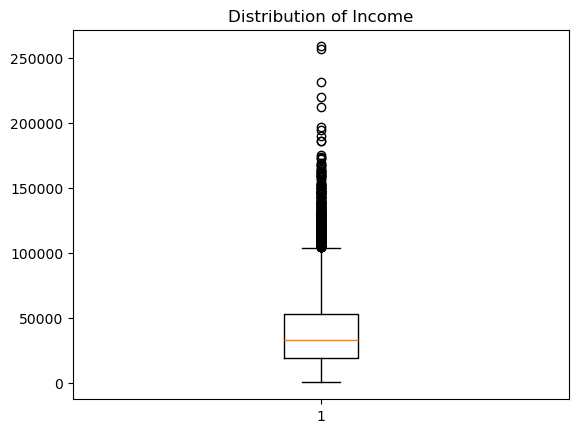

In [4]:
## C1. Visualization of Distribution of Continuous Variables with Boxplots

# import matplotlib.pylot in order to generate plots
import matplotlib.pyplot as plt

# Generate and display boxplot of the 'Age' variable to observe the distribution of the variable
plt.boxplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

# Generate and display boxplot of the 'Income' variable to observe the distribution of the variable
plt.boxplot(df['Income'])
plt.title('Distribution of Income')
plt.show()


### C1. Visualization of the Distributions of Two Categorical Variables
The distributions of the following categorical variables will be visualized using barplots and by displaying the frequency of responses of each category.


- `Churn`: Whether the customer discontinued service within the last month (yes, no) (**binary nominal categorical data**)
- `Gender`: Customer self-identification as male, female, or nonbinary (**nominal categorical data**)

In [5]:
## C1. Visualization of Distribution of Categorical Variables with Counts

# Count the Yes and No responses in the 'Churn' variable
catCounts1 = df['Churn'].value_counts()
print('Frequency of Churn Responses')
print(catCounts1)

# Count the male, female, and nonbinary responses in the 'Gender' variable
catCounts2 = df['Gender'].value_counts()
print('Frequency of Gender Responses')
print(catCounts2)


Frequency of Churn Responses
Churn
No     7350
Yes    2650
Name: count, dtype: int64
Frequency of Gender Responses
Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64


In [ ]:
#  binaryVars = df[['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 
#                  'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
#                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]


# Count the Yes and No responses in the 'Churn' variable
catCounts1 = df['Churn'].value_counts()
print('Frequency of Churn Responses')
print(catCounts1)

# Create lists from the counts of the 'Churn' variable
cats1 = catCounts1.index.tolist()
counts1 = catCounts1.values.tolist()

# Generate a bar plot of the 'Churn' variable
plt.bar(cats1, counts1)
plt.title('Histogram of Churn Variable')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

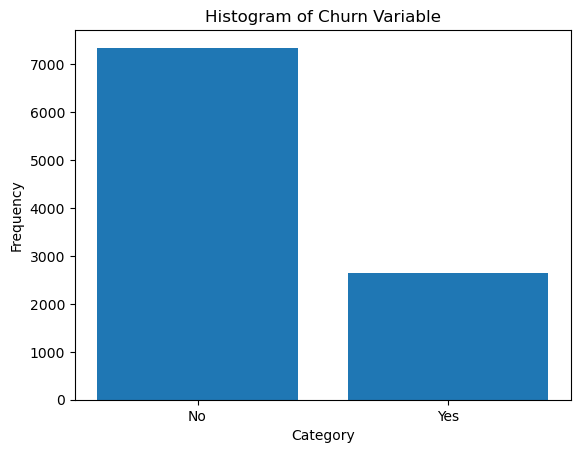

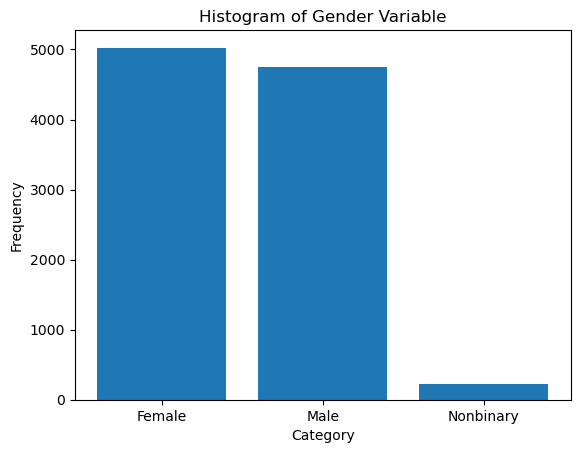

In [6]:
## C1. Visualization of Distribution of Categorical Variables with Barplots

# Create lists from the counts of the 'Churn' variable
cats1 = catCounts1.index.tolist()
counts1 = catCounts1.values.tolist()

# Generate a bar plot of the 'Churn' variable
plt.bar(cats1, counts1)
plt.title('Histogram of Churn Variable')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# Create lists from the counts of the 'Gender' variable
cats2 = catCounts2.index.tolist()
counts2 = catCounts2.values.tolist()

# Generate a bar plot of the 'Gender' variable
plt.bar(cats2, counts2)
plt.title('Histogram of Gender Variable')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

## D. Bivariate Statistics
The Pearson correlation coefficient is calculated below to assess the relationship between the continuous variables `Income` and `Age` by testing the hypotheses:


- $H_0$: There is a linear relationship between `Income` and `Age`
- $H_a$: There is no linear relationship between `Income` and `Age`

As shown below, the Pearson correlation coefficient is $r = -0.00409$, which suggests a very weak negative correlation between the two variables. However, the p-value of $p = 0.6825$ is much greater than $\alpha = 0.05$, so we do not have sufficient evidence to reject the null hypothesis. This suggests that there is no significant linear relationship between the continuous variables `Income` and `Age` (Bobbitt, 2019).

In [7]:
## D. Bivariate Statistics

# import the Pearson test from scipy.stats
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df['Income'], df['Age'])

# Print the results
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: -0.004090601798152994
p-value: 0.6825317681879338


The contingency table for the categorical variables `Churn` and `Gender` is shown below. The $\chi^2$ Test for Independence is used below to assess the relationship between these categorical variables by testing the hypotheses:


- $H_0$: `Churn` and `Gender` are independent
- $H_a$: `Churn` and `Gender` are not independent

As shown below, the p-value from the $\chi^2$ Test for Independence was found to be $p = 0.0194$. Since this is less than $\alpha = 0.05$, we can reject the null hypothesis of independence, and conclude that there is evidence of an association between the variables `Churn` and `Gender`. 

In [8]:
## D. Bivariate Statistics

# Generate the Contingency Table
contingency_table = pd.crosstab(df['Churn'], df['Gender'])

# Perform Chi Square Test
chisq, p, dof, expected = chi2_contingency(contingency_table)

# Output of Results

print('Contingency Table')
print(contingency_table)
print('Chi Square Statistic:', chisq)
print('P-value:', p)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:')
print(expected)

Contingency Table
Gender  Female  Male  Nonbinary
Churn                          
No        3753  3425        172
Yes       1272  1319         59
Chi Square Statistic: 7.880065153719115
P-value: 0.019447581193944605
Degrees of Freedom: 2
Expected Frequencies:
[[3693.375 3486.84   169.785]
 [1331.625 1257.16    61.215]]


### D1. Visualization of the Distribution of Two Continuous Variables
The distributions of the continuous variables `Age` and `Income` are visualized below using a scatter plot.

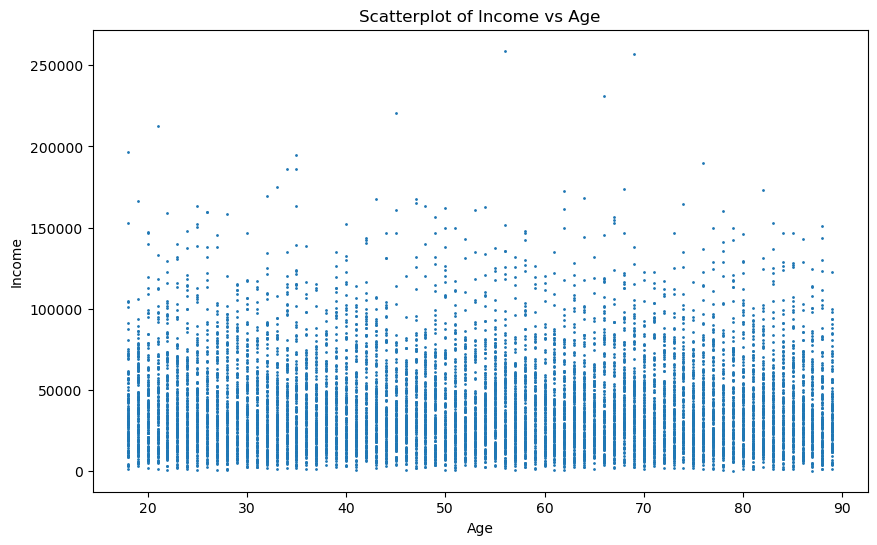

In [9]:
## D1. Creating the Scatter Plot of Two Continuous Variables

plt.figure(figsize=(10,6))

plt.scatter(df['Age'], df['Income'], s=1)

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatterplot of Income vs Age')
plt.show()

### D1. Visualization of the Distribution of Two Categorical Variables
The distributions of the categorical variables `Churn` and `Gender` are visualized below with stacked bar charts.

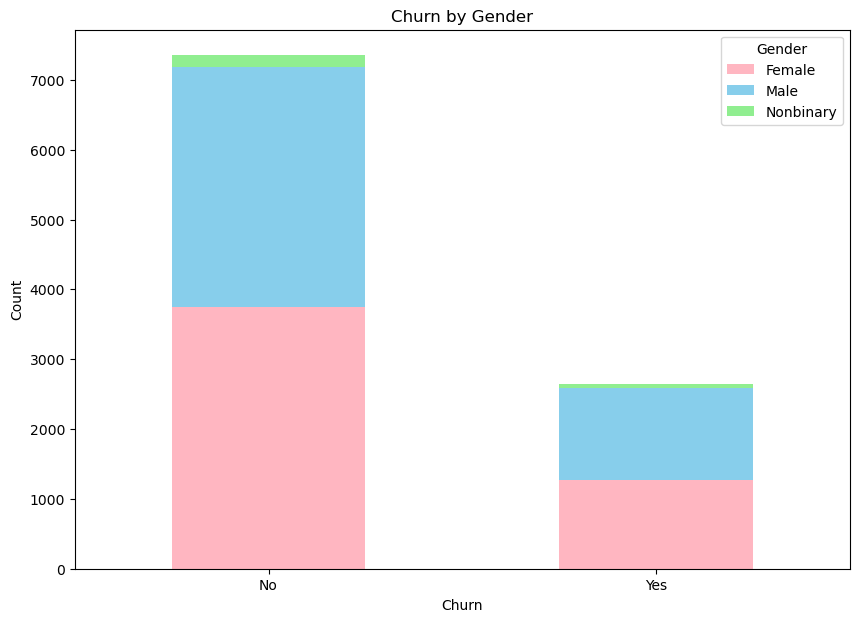

In [10]:
## Creating the Stacked Bar Charts of Two Categorical Variables

# Creating a pivot table
pivot_table = df.pivot_table(index=df['Churn'], columns=df['Gender'], aggfunc='size')

# Generate a stacked bar chart of the 'Churn' and 'Gender' variables
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightpink', 'skyblue', 'lightgreen'])

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn by Gender')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

## E.  Summary of the Implications of the Analysis
### E1.  Results of the Hypothesis Test

The null and alternative hypotheses for this research question are:


- $H_0$: Churn and online backup service are independent
- $H_a$: Churn and online backup service are not independent

As shown above, the p-value from the $\chi^2$ Test for Independence was found to be $p = 0.000000495$. Since this is much less than $\alpha = 0.05$, we can reject the null hypothesis of independence, and conclude that there is evidence of an association between the variables `Churn` and `OnlineBackup`. 

### E2.  Limitations of the Analysis
Some limitations to the $\chi^2$ Test for Independence is that it only tells us about the existence of a relationship. This test does not allude to the direction of association, nor does it convey the level of importance of the findings (Zegras, 2006).

### E3.  Recommended Course of Action
The recommended course of action would be to investigate the relationship further, as well as seek to uncover other relationships between the `Churn` variable and the variables that influence it.

### F. Panopto Video Demonstrating the Code Functionality
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6fdc3e7f-4d2e-4bbe-81e3-b1960154de42

### G. Acknowledgement of Web Sources

pandas.crosstab — pandas 2.2.2 documentation. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

pandas.pivot_table — pandas 2.2.2 documentation. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

scipy.stats.chi2_contingency — SciPy v1.13.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

scipy.stats.pearsonr — SciPy v1.13.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

### H. Acknowledgement of Sources
Bobbitt, Z. (2021). How to perform a chi-square test of Independence in SAS. Statology. https://www.statology.org/chi-square-test-of-independence-in-sas/ 

Bobbitt, Z. (2019). Pearson Correlation Coefficient. https://www.statology.org/pearson-correlation-coefficient/

Zegras, C. (2006). Analyzing Bivariate Data: Categorical [pdf]. https://dspace.mit.edu/bitstream/handle/1721.1/55900/11-220Spring-2006/NR/rdonlyres/Urban-Studies-and-Planning/11-220Spring-2006/2A93ECC5-96CD-4CC8-94BD-5003BF1D1445/0/lect15.pdf.
